# Informações sobre o conjunto de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ALTERAR CAMINHO DO ARQUIVO
pheno_path = "C:/Users/biapr/Desktop/SME0880/ABIDE_pcp/Phenotypic_V1_0b_preprocessed1.csv"
pheno = pd.read_csv(pheno_path)
pheno.head()

,Unnamed: 0.1,Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
0,0,1,50002,1,50002,PITT,no_filename,1,1,16.77,...,NaN,OK,NaN,fail,ic-parietal-cerebellum,OK,NaN,fail,ERROR #24,1
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
2,2,3,50004,3,50004,PITT,Pitt_0050004,1,1,19.09,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
4,4,5,50006,5,50006,PITT,Pitt_0050006,1,1,13.37,...,NaN,OK,NaN,maybe,ic-parietal slight,OK,NaN,OK,NaN,1


In [3]:
pheno = pheno[['SUB_ID','SITE_ID','SEX','AGE_AT_SCAN','ADOS_TOTAL','DX_GROUP']]
pheno.head()

,SUB_ID,SITE_ID,SEX,AGE_AT_SCAN,ADOS_TOTAL,DX_GROUP
0,50002,PITT,1,16.77,12.0,1
1,50003,PITT,1,24.45,13.0,1
2,50004,PITT,1,19.09,18.0,1
3,50005,PITT,2,13.73,12.0,1
4,50006,PITT,1,13.37,12.0,1


In [4]:
pheno.rename(columns={'DX_GROUP': 'DIAG'}, inplace=True)

In [5]:
diagnostico = {1:"ASD", 2:"TD"}
pheno['DIAG'] = pheno['DIAG'].replace(diagnostico)

In [6]:
sexo = {1:"M", 2:"F"}
pheno['SEX'] = pheno['SEX'].replace(sexo)

In [7]:
pheno.dtypes

SUB_ID           int64
SITE_ID         object
SEX             object
AGE_AT_SCAN    float64
ADOS_TOTAL     float64
DIAG            object
dtype: object

In [9]:
pheno.head(30)

,SUB_ID,SITE_ID,SEX,AGE_AT_SCAN,ADOS_TOTAL,DIAG
0,50002,PITT,M,16.77,12.0,ASD
1,50003,PITT,M,24.45,13.0,ASD
2,50004,PITT,M,19.09,18.0,ASD
3,50005,PITT,F,13.73,12.0,ASD
4,50006,PITT,M,13.37,12.0,ASD
5,50007,PITT,M,17.78,17.0,ASD
6,50008,PITT,M,32.45,16.0,ASD
7,50009,PITT,M,33.86,10.0,ASD
8,50010,PITT,M,35.20,-9999.0,ASD
9,50011,PITT,M,16.93,13.0,ASD


In [20]:
pheno.describe()

,SUB_ID,AGE_AT_SCAN,ADOS_TOTAL
count,1112.000000,1112.000000,442.000000
mean,50752.684353,17.048864,-600.411765
std,447.680666,8.036419,2400.010037
min,50002.000000,6.470000,-9999.000000
25%,50354.750000,11.658575,8.000000
50%,50724.500000,14.660000,11.000000
75%,51153.250000,20.085000,14.000000
max,51607.000000,64.000000,22.000000


In [21]:
pheno.isna().sum()

SUB_ID           0
SITE_ID          0
SEX              0
AGE_AT_SCAN      0
ADOS_TOTAL     670
DIAG             0
dtype: int64

In [22]:
pheno.nunique()

SUB_ID         1112
SITE_ID          20
SEX               2
AGE_AT_SCAN     709
ADOS_TOTAL       24
DIAG              2
dtype: int64

In [23]:
contagem_dx = pheno['DIAG'].value_counts()
categorias_dx = contagem_dx.index.to_numpy()
valores_dx = contagem_dx.to_numpy()

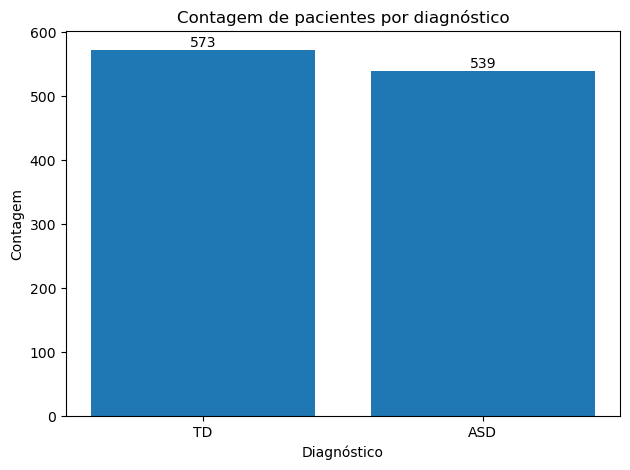

In [26]:
plt.bar(categorias_dx, valores_dx)

for i, v in enumerate(valores_dx):
    plt.text(i, v+0.1, str(v), ha='center', va='bottom',fontsize=10)

plt.title("Contagem de pacientes por diagnóstico")
plt.xlabel("Diagnóstico")
plt.ylabel("Contagem")
plt.xticks(categorias_dx)
plt.tight_layout()

In [36]:
pd.crosstab(pheno['DIAG'], pheno['SEX'])

SEX,F,M
DIAG,,
ASD,65,474
TD,99,474


In [30]:
pd.crosstab(pheno['SITE_ID'], pheno['DIAG'])

DIAG,ASD,TD
SITE_ID,,
CALTECH,19,19
CMU,14,13
KKI,22,33
LEUVEN_1,14,15
LEUVEN_2,15,20
MAX_MUN,24,33
NYU,79,105
OHSU,13,15
OLIN,20,16


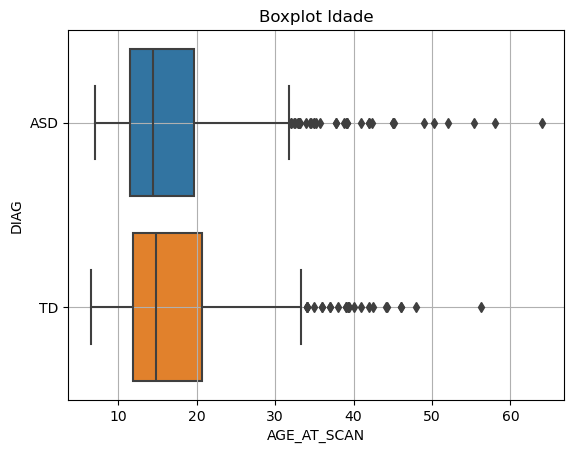

In [45]:
sns.boxplot(x = pheno['AGE_AT_SCAN'], y= pheno['DIAG'])

plt.title("Boxplot Idade")
plt.grid(True)
plt.show()

# Conclusões
O conjunto de dados da ABIDE contém 1.112 observações, obtidas de 17 diferentes fornecedores. 
A variável resposta, que é o diagnóstico, se divide de forma equilibrada entre pacientes com ASD e pacientes controle(TD), sendo 573 TD e 539 ASD. 
No conjunto é possível observar uma maior prevalência de pacientes do sexo masculino. 
Em relação a idade da coleta do exame de idade é possível notar que nos dois grupos tem-se distribuições parecidas, embora seja perceptivel que pacientes com ASD são examinados um pouco mais novos que pacientes com desenvolvimento típico. 